
21BAI1892

# **MV AS-1 (a)**


# Task 1:  Basic Image Statistics and Color Space Conversion

In [ ]:
import cv2
from google.colab.patches import cv2_imshow
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
img = cv2.imread('mew.jpg')

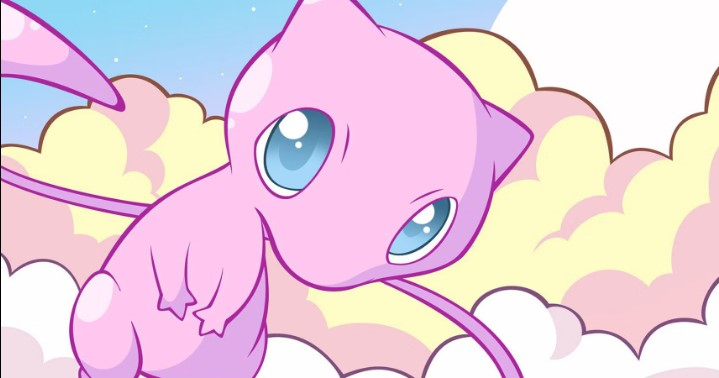

In [ ]:
cv2_imshow(img)

In [ ]:
#splitting the image into the 3 color channels
b, g, r = cv2.split(img)
print(f"{b}\n\n\n{g}\n\n\n{r}")

[[ 44 133 135 ... 254 254 254]
 [ 37 151 132 ... 254 254 254]
 [ 21 211 189 ... 254 254 254]
 ...
 [  2 229 233 ... 231 231 231]
 [  2 229 233 ... 231 231 231]
 [  2 229 233 ... 231 231 231]]


[[  0  53  45 ... 253 253 253]
 [  0  84  53 ... 253 253 253]
 [  0 168 132 ... 253 253 253]
 ...
 [  0 222 225 ... 222 222 222]
 [  0 222 225 ... 222 222 222]
 [  0 222 225 ... 222 222 222]]


[[ 43 136 145 ... 255 255 255]
 [ 35 153 140 ... 255 255 255]
 [ 20 211 193 ... 255 255 255]
 ...
 [  8 235 242 ... 243 243 243]
 [  8 235 242 ... 242 242 242]
 [  8 235 242 ... 242 242 242]]


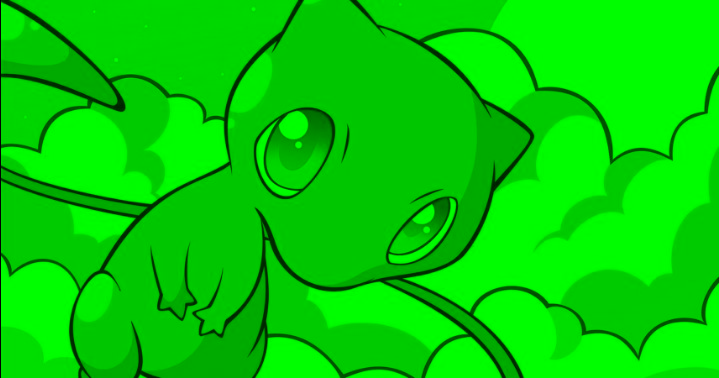

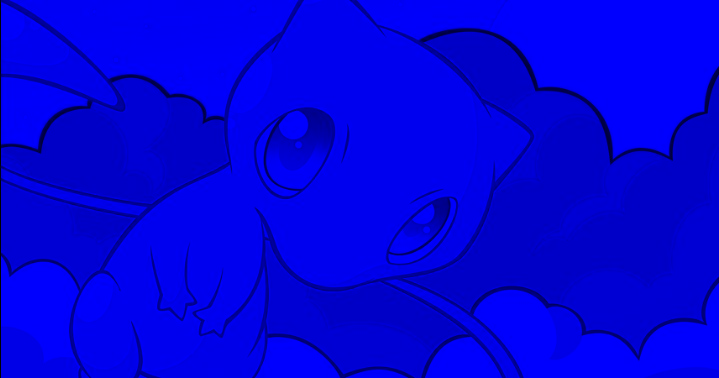

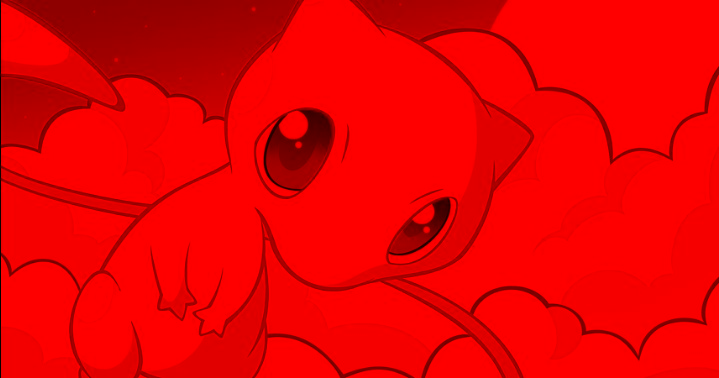

In [ ]:
#displaying the color channels as bgr images
zeros = np.zeros(b.shape, np.uint8)
bbg = cv2.merge([b,zeros,zeros])
gbg = cv2.merge([zeros,g,zeros])
rgg = cv2.merge([zeros,zeros,r])
cv2_imshow(gbg)
cv2_imshow(bbg)
cv2_imshow(rgg)

In [ ]:
#mean
mb = np.mean(b)
mg = np.mean(g)
mr = np.mean(r)

In [ ]:
print(f"mean of blue: {mb} \nmean of green: {mg} \nmean of red: {mr}")

mean of blue: 223.6145256124394 
mean of green: 209.93180931776203 
mean of red: 234.02975546577773


In [ ]:
#standard deviation
sb = np.std(b)
sg = np.std(g)
sr = np.std(r)

In [ ]:
print(f"standard deviation of blue: {sb} \nstandard deviation of green: {sg} \nstandard deviation of red: {sr}")

standard deviation of blue: 32.084360385329944 
standard deviation of green: 46.17399842597332 
standard deviation of red: 37.84960765968983


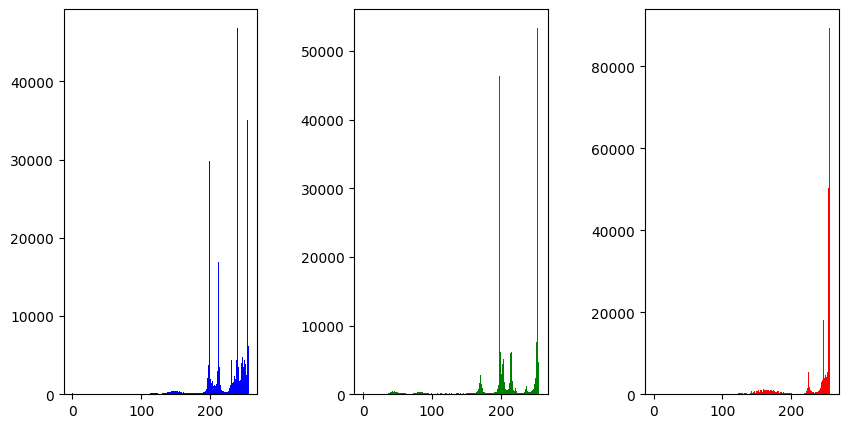

In [ ]:
#histogram
fig, (a1,a2,a3) = plt.subplots(1, 3, figsize=(10,5))
a1.hist(b.ravel(), bins=256, range=(0, 256), color='blue')
a2.hist(g.ravel(), bins=256, range=[0,256], color='green')
a3.hist(r.ravel(), bins=256, range=[0,256], color='red')
plt.subplots_adjust(wspace=0.5)

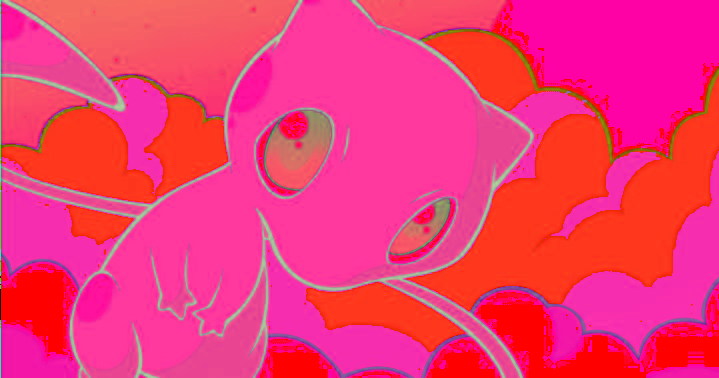

In [ ]:
#convert to HSV color space
hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
cv2_imshow(hsv)

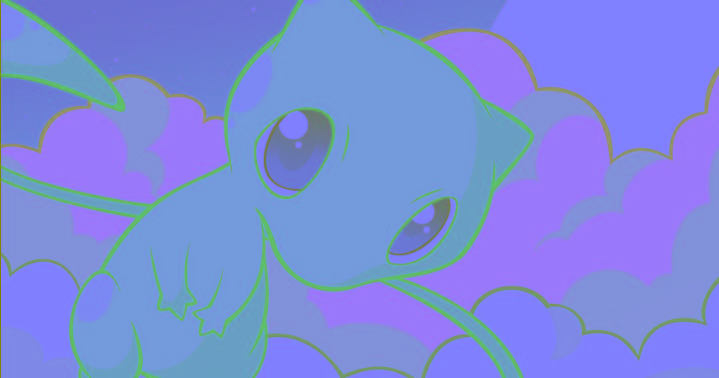

In [ ]:
#convert to LAB color space
lab = cv2.cvtColor(img, cv2.COLOR_BGR2LAB)
cv2_imshow(lab)

# Task 2: Simple Image Segmentation Using Thresholding

In [ ]:
#getting a grayscale image from existing image
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

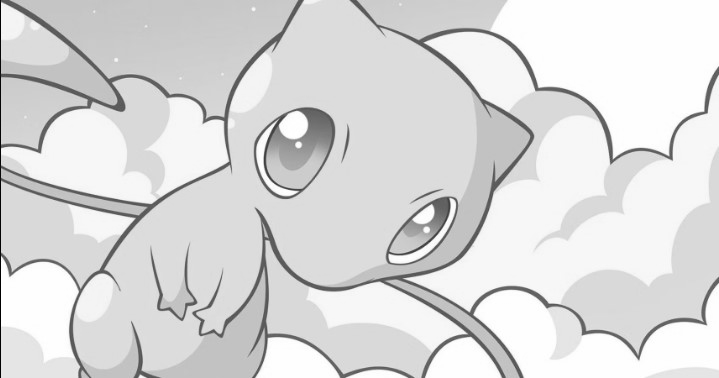

In [ ]:
cv2_imshow(gray)

In [ ]:
#using threshold to segment the image
ret, thresh = cv2.threshold(gray, 200, 255, cv2.THRESH_BINARY)

Text(0.5, 1.0, 'Segmented')

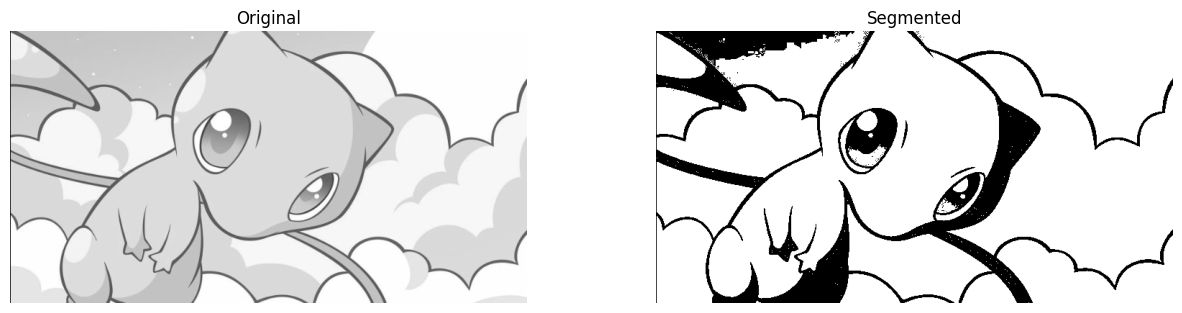

In [ ]:
#showing original and segmented images
plt.figure(figsize=(15,10))
plt.subplots_adjust(wspace=0.25)
plt.subplot(1,2,1)
plt.imshow(gray, cmap='gray')
plt.axis('off')
plt.title("Original")
plt.subplot(1,2,2)
plt.imshow(thresh, cmap='gray')
plt.axis('off')
plt.title("Segmented")

# Task 3: Color Based Segmentation

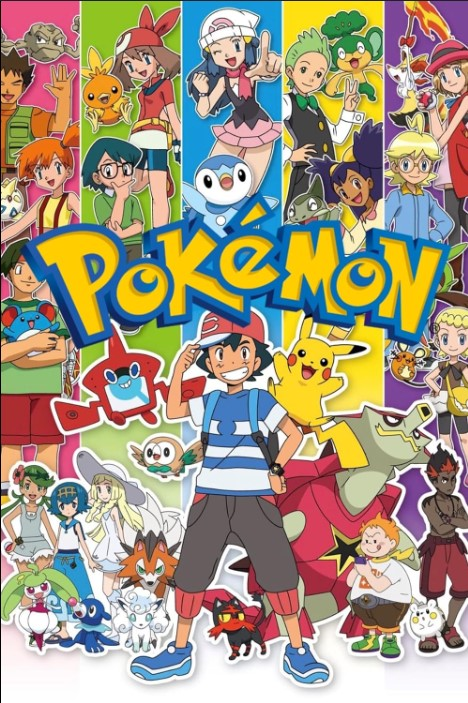

In [ ]:
pkmn = cv2.imread('pkmn.jpg')
cv2_imshow(pkmn)

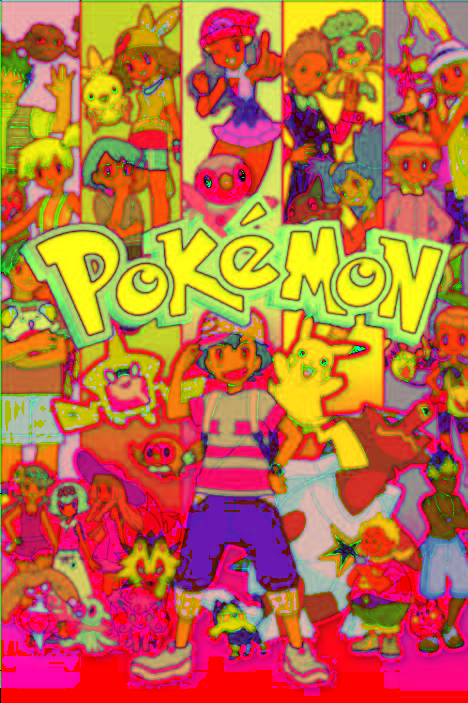

In [ ]:
#convert to hsv
h = cv2.cvtColor(pkmn, cv2.COLOR_BGR2HSV)
cv2_imshow(h)

In [ ]:
#segmenting objects of blue color
lower = np.array([100, 150, 0])
higher = np.array([140, 255, 255])
mask = cv2.inRange(h, lower, higher) #when in range, white, else, black
res = cv2.bitwise_and(pkmn, pkmn, mask=mask) #to show parts of the image that match the color range specified by the mask

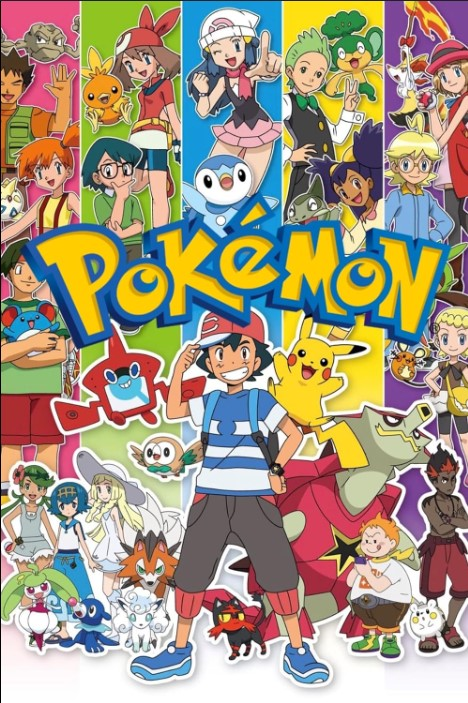

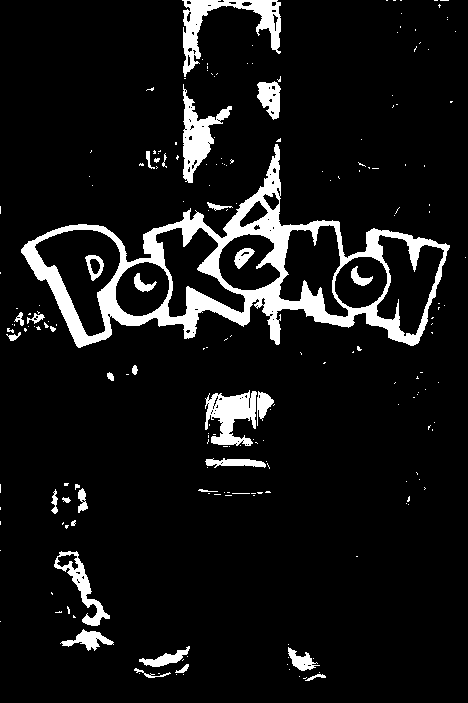

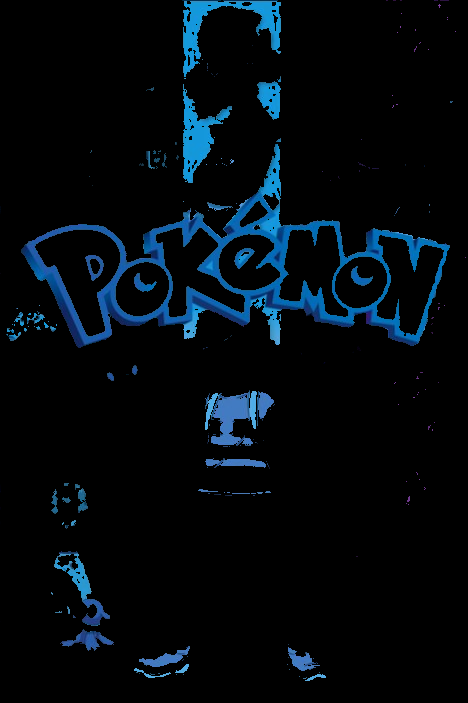

In [ ]:
#displaying original and segmented
cv2_imshow(pkmn)
print()
cv2_imshow(mask)
print()
cv2_imshow(res)